In [3]:
!pip3 install sortedcontainers
from metawars_api import *
import pandas as pd
import numpy as np
from sortedcontainers import SortedList
from tqdm import tqdm
import os

In [5]:
import sortedcontainers

unit_types = ["peasant", "swordman", "spearman", "archer", "defender", "horseman", "sniper", "knight", "elefant"]
equipment_types = ["wood", "steel", "diamond"]

units = []
c = 1
for ut in unit_types:
    for wt in equipment_types:
        for at in equipment_types:
            for l in range(1,10000):
                u = Unit(ut, wt, at, l)
                u.id = c
                if (u.cost) > 100000:
                    break
                units.append((c, u.cost, u, u.unit_type))
                c =  c + 1

units_by_cost = SortedList(units, key=lambda x: x[1])

In [6]:
import json
def parse_results(lines):
    results = []

    for i,l in enumerate(lines):
        numbers =  l.strip('\n').split('|')
        score = int(float(numbers[0]))
        try:
            army = json.loads(numbers[1])
        except:
            print(i)
        results.append((score, army))
    return results

In [33]:
def parse_army(army_ids):
    army = []
    for idx in army_ids:
        army.append(units[idx-1][2])
    return army

In [62]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_results(number, file, iter):
    lines = []

    with open(file, 'r') as f:
        lines = f.readlines()

    results = sorted(parse_results(lines[iter*100:iter*100+100]), key=lambda x: x[0], reverse=True)
    scores = np.array([x[0] for x in results])
    armies = [parse_army(x[1]) for x in results]

        # Plotting a basic histogram
    plt.hist(scores, bins=50, color='skyblue', edgecolor='black')
    plt.xticks([i*10 for i in range(20)], rotation=90)
    
    # Adding labels and title
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of army scores for results {number} for iter {iter}')

    print(scores[scores < 150].mean())
    print(len(scores[scores < 150]))
    
    # Display the plot
    plt.show()



75.0
76


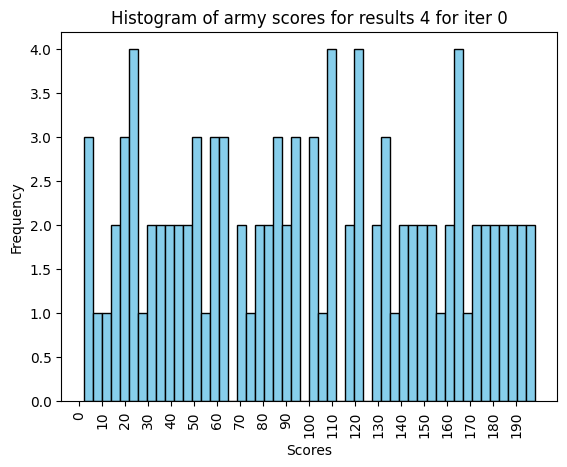

66.0
67


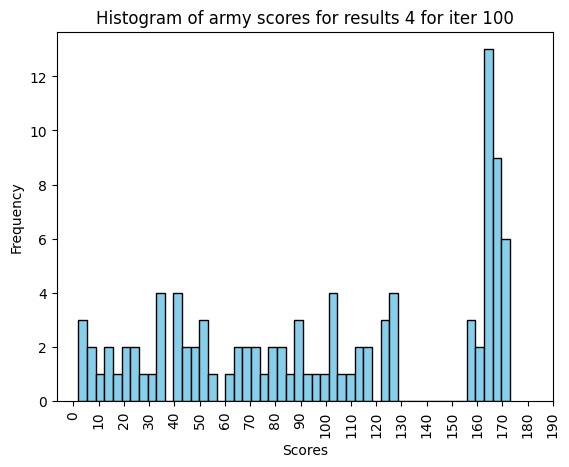

In [68]:

analyze_results(4, 'results/results_params4.data', 0)
analyze_results(4, 'results/results_params4.data', 100)




In [20]:
len(list(filter(lambda x: x < 170, scores)))
arr = np.array(scores)

In [27]:
arr[arr < 150].mean()

66.0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])